In [1]:
from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Objective 1: File Path and Reading
df = pd.read_excel("FOIALog_FY07.xlsx")
df = df.fillna(method="ffill")

In [3]:
count = 1
for index, row in df.iterrows():
    print(row['Description'])
    count += 1
    if count == 5:
        break

All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.
Information relating to an operation at the end of the Gulf War in April of 1991
dubbed "Operation Manly Rip".
A clearly releasable copy of Sections A through J of the awarded contract, including the statement of work, for the contract awarded from solicitation number HROO11O6ROO2.
A copy of Section A (the cover page) for any contract awarded to date from
solicitation number EFTHQ00038615002.


In [4]:
def str_to_split(x):
    return re.sub(r'\W+', ' ', x).split()

In [5]:
sentence = []
for index, row in df.iterrows():
    sentence.append(str_to_split(row['Description']))

In [6]:
m = Word2Vec(sentence, size=50, min_count=1,sg=1)
def vectorizer(sent,m):
    vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                vec = m[w]
            else:
                vec = np.add(vec, m[w])
            numw += 1
        except:
            pass
    return np.asarray(vec)/numw

l = []
for i in sentence:
    l.append(vectorizer(i,m))
X = np.array(l)

<ipython-input-6-d6564af3d7a0>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = m[w]
<ipython-input-6-d6564af3d7a0>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = np.add(vec, m[w])


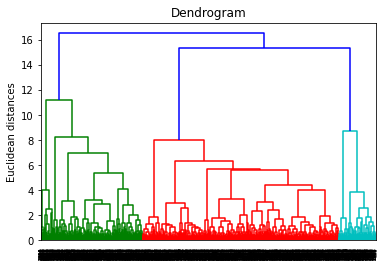

In [10]:
Z = hierarchy.linkage(X, "ward")
dn = hierarchy.dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
#plt.xlim(0,100)
#plt.ylim(0,0.05)
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)
print(y_hc)
for index, sentence in enumerate(sentence):
    print(str(y_hc[index]) + ":" + str(sentence))

[2 2 1 ... 2 2 2]
2:['All', 'records', 'regarding', 'the', 'service', 'of', 'the', '208th', 'Engineer', 'Combat', 'Battalion', 'anytime', 'between', 'December', '7', '1941', 'and', 'January', '1', '1947']
2:['Information', 'relating', 'to', 'an', 'operation', 'at', 'the', 'end', 'of', 'the', 'Gulf', 'War', 'in', 'April', 'of', '1991', 'dubbed', 'Operation', 'Manly', 'Rip']
1:['A', 'clearly', 'releasable', 'copy', 'of', 'Sections', 'A', 'through', 'J', 'of', 'the', 'awarded', 'contract', 'including', 'the', 'statement', 'of', 'work', 'for', 'the', 'contract', 'awarded', 'from', 'solicitation', 'number', 'HROO11O6ROO2']
1:['A', 'copy', 'of', 'Section', 'A', 'the', 'cover', 'page', 'for', 'any', 'contract', 'awarded', 'to', 'date', 'from', 'solicitation', 'number', 'EFTHQ00038615002']
1:['A', 'copy', 'of', 'Section', 'A', 'the', 'cover', 'page', 'for', 'any', 'contract', 'awarded', 'to', 'date', 'from', 'solicitation', 'number', 'BAA0539']
1:['A', 'clearly', 'releasable', 'copy', 'of', 'S

2:['The', 'sworn', 'testimony', 'given', 'by', 'LCDR', 'to', 'Ms', 'Department', 'of', 'Defense', 'Investigator', 'on', 'Thursday', 'February', '6', '2003', 'in', 'the', 'Naval', 'Ordnance', 'Test', 'Unit', 's', 'Port', 'Office', 'Conference', 'Room', 'at', 'Cape', 'Canaveral', 'Air', 'Force', 'Station', 'Florida']
2:['Any', 'materials', 'prepared', 'in', 'response', 'to', 'FOIA', 'case', '04', 'F', '0037', 'of', '10', '8', '03', 'COPIES', 'OF', 'THE', 'BUDGET', 'FOR', 'THE', 'PROCUREMENT', 'AND', 'CONVERSION', 'OF', 'THE', 'MOSS', 'SIRIUS', 'PLATFORM', 'PART', 'OF', 'THE', 'SBX', 'RADAR', 'SYSTEM']
2:['Announcements', 'of', 'opportunity', 'requests', 'for', 'proposals', 'or', 'other', 'such', 'material', 'produced', 'by', 'MDA', 'or', 'other', 'Department', 'of', 'Defense', 'entities', 'soliciting', 'bids', 'for', 'the', 'maintenance', 'and', 'upgrade', 'work', 'on', 'SBX']
2:['Records', 'concerning', 'the', 'U', 'S', 'investigation', 'of', 'a', 'July', '2002', 'incident', 'in', 'whic